In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the Training Data

In [2]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.reuters.load_data(num_words=10000)
print(f"Size of Train Data - {train_data.shape}")
print(f"Size of Train Label - {train_label.shape}")
print(f"Size of Test Data - {test_data.shape}")
print(f"Size of Test Label - {test_label.shape}")

Size of Train Data - (8982,)
Size of Train Label - (8982,)
Size of Test Data - (2246,)
Size of Test Label - (2246,)


c:\users\subhadeep banerjee\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\subhadeep banerjee\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(train_data[0], type(train_data[0]))
print(train_label[0], type(train_label[0]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] <class 'list'>
3 <class 'numpy.int64'>


In [4]:
## checking the max index
max([max(seq) for seq in train_data])

9999

In [5]:
# Decoding
word_index = tf.keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Encoding the integer seq into binary matrix

In [6]:
# One hot encoding the whole dataset
def vectorize_seqs(seq, dim=10000):
    res = np.zeros((len(seq), dim))
    for i, s in enumerate(seq):
        res[i, s] = 1
    return res
X_train = vectorize_seqs(train_data)
X_test = vectorize_seqs(test_label)

Y_train = np.asarray(train_label).astype('float32')
Y_test = np.asarray(test_label).astype('float32')

In [7]:
print(f"Size of Train Data - {X_train.shape}")
print(f"Size of Train Label - {X_test.shape}")
print(f"Size of Test Data - {Y_train.shape}")
print(f"Size of Test Label - {Y_test.shape}")

Size of Train Data - (8982, 10000)
Size of Train Label - (2246, 10000)
Size of Test Data - (8982,)
Size of Test Label - (2246,)


In [8]:
print(X_train[0], type(X_train[0]))

[0. 1. 1. ... 0. 0. 0.] <class 'numpy.ndarray'>


## One Hot Encoding

In [9]:
encoded_train_labels = tf.keras.utils.to_categorical(train_label)
encoded_test_labels = tf.keras.utils.to_categorical(test_label)

## Making the Model

### Making the validation set

In [10]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = encoded_train_labels[:1000]
partial_y_train = encoded_train_labels[1000:]

### Model Architecture

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 64, activation='relu', input_shape = (10000,)))
model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
model.add(tf.keras.layers.Dense(units = 46, activation='softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(partial_x_train,partial_y_train,
         epochs = 10,
         batch_size = 512,
         validation_data = (x_val, y_val))

Epoch 1/10
16/16 [==============================] - 6s 278ms/step - loss: 3.1330 - accuracy: 0.4059 - val_loss: 1.7775 - val_accuracy: 0.6370
Epoch 2/10
16/16 [==============================] - 1s 34ms/step - loss: 1.5721 - accuracy: 0.6792 - val_loss: 1.3248 - val_accuracy: 0.6930
Epoch 3/10
16/16 [==============================] - 1s 55ms/step - loss: 1.1273 - accuracy: 0.7526 - val_loss: 1.1446 - val_accuracy: 0.7350
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.8878 - accuracy: 0.8085 - val_loss: 1.0426 - val_accuracy: 0.7640
Epoch 5/10
16/16 [==============================] - 1s 50ms/step - loss: 0.7006 - accuracy: 0.8547 - val_loss: 0.9595 - val_accuracy: 0.7810
Epoch 6/10
16/16 [==============================] - 1s 52ms/step - loss: 0.5544 - accuracy: 0.8855 - val_loss: 0.9089 - val_accuracy: 0.8080
Epoch 7/10
16/16 [==============================] - 1s 45ms/step - loss: 0.4392 - accuracy: 0.9127 - val_loss: 0.8978 - val_accuracy: 0.8030
Epoch 8/10
1

In [13]:
hist_dict = history.history
print(hist_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [14]:
acc = hist_dict.get('accuracy')
print(f"Accuracy - {sum(acc)/len(acc) * 100}%")

val_acc = hist_dict.get('val_accuracy')
print(f"Validation Accuracy - {sum(val_acc)/len(val_acc) * 100}%")

Accuracy - 82.30268001556396%
Validation Accuracy - 76.7600005865097%


## Plotting training and validation Loss

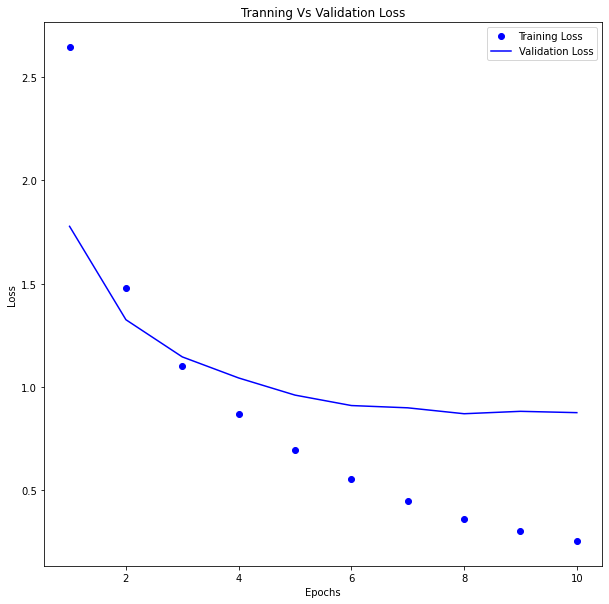

In [15]:
loss = hist_dict.get('loss')
val_loss = hist_dict.get('val_loss')
epochs = range(1, len(loss) + 1)
figure = plt.figure(figsize = (10, 10))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Tranning Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting training and validation Accuracy 

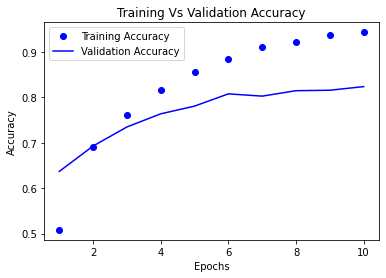

In [16]:
plt.clf() # Clear the figure
acc = hist_dict.get('accuracy')
val_acc = hist_dict.get('val_accuracy')
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()